In [103]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense,Conv2D,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import adam
import os

In [37]:
train_dir = 'mnistasjpg/trainingSet/trainingSet/'
category = ['0','1','2','3','4','5','6','7','8','9']
test_dir = 'mnistasjpg/testSet/testSet/'

In [38]:
training_data = []
def create_training_data():
    for catego in category:
        class_num = category.index(catego)
        path = os.path.join(train_dir,catego)
        for img in os.listdir(path):
            any_img = io.imread(os.path.join(path,img), as_gray=True)
            training_data.append([any_img,class_num])
create_training_data()

In [44]:
len(training_data)

42000

In [45]:
import random
random.shuffle(training_data)

In [78]:
training_data = np.array(training_data)
training_data.shape

(42000, 2)

In [ ]:
for sample in training_data[:1]:
    print(sample)

In [66]:
features = []
label = []

In [70]:
for X,Y in training_data:
    features.append(X)
    label.append(Y)
features = np.array(features)

In [85]:
features.shape

(84000, 28, 28)

In [84]:
len(label)

84000

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.2,random_state=10)

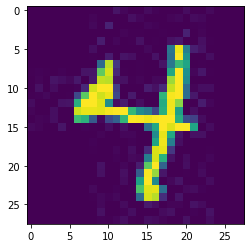

In [88]:
plt.imshow(X_train[0])

In [96]:
X_train_new = X_train.reshape(67200, 28, 28,1)
X_test_new = X_test.reshape(16800, 28, 28,1)

In [98]:
Y_train = to_categorical(Y_train)

In [107]:
Y_test = to_categorical(Y_test)

In [108]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                368650    
Total params: 406,218
Trainable params: 406,218
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer=adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [118]:
Model =model.fit(X_train_new,Y_train,validation_data=(X_test_new,Y_test),epochs=3,verbose=1,batch_size=1000)

Train on 67200 samples, validate on 16800 samples
Epoch 1/3
67200/67200 [==============================] - 211s 3ms/step - loss: 0.0151 - acc: 0.9958 - val_loss: 0.0240 - val_acc: 0.9948
Epoch 2/3
67200/67200 [==============================] - 217s 3ms/step - loss: 0.0056 - acc: 0.9989 - val_loss: 0.0185 - val_acc: 0.9954
Epoch 3/3
67200/67200 [==============================] - 217s 3ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 0.0179 - val_acc: 0.9958


In [124]:
_,train = model.evaluate(X_train_new,Y_train)
_,test = model.evaluate(X_test_new,Y_test)
print('Test : {}\n Train : {}'.format(test,train))

16800/16800 [==============================] - 19s 1ms/step
Test : 0.9957738095238096
 Train : 0.9998958333333333


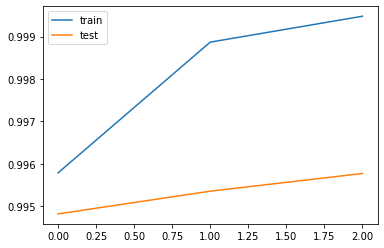

In [121]:
plt.plot(Model.history['acc'],label='train')
plt.plot(Model.history['val_acc'],label='test')
plt.legend()

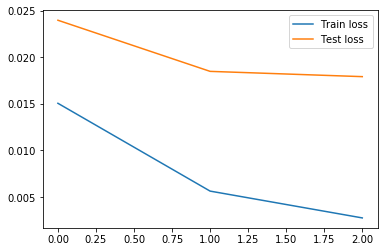

In [123]:
plt.plot(Model.history['loss'],label='Train loss')
plt.plot(Model.history['val_loss'],label='Test loss')
plt.legend()

In [314]:
model.save('MNIST.model')

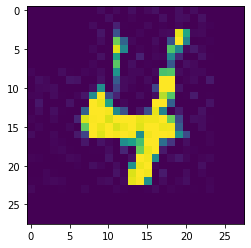

In [319]:
plt.imshow(X_test[1])

In [320]:
# X_test_new[:1]
Y_test[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Digit is: 7


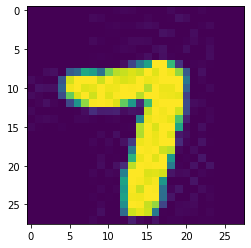

Digit is: 4


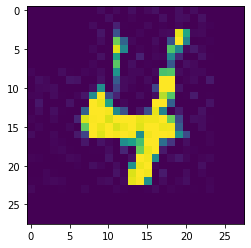

Digit is: 7


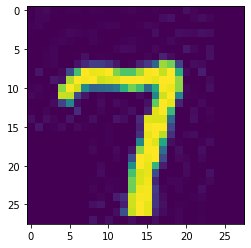

Digit is: 2


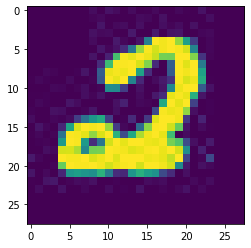

Digit is: 9


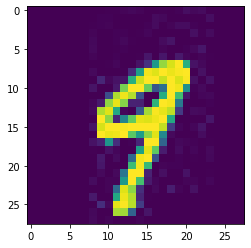

In [317]:
for check in X_test_new[:5]:
    n_check = check.reshape(1,28,28,1)
    pred = model.predict(n_check)
    print('Digit is: {}'.format(np.argmax(pred)))
    plt.imshow(check.reshape(28,28))
    plt.show()

In [245]:
X_test_new[:1000].shape

(1000, 28, 28, 1)

In [200]:
predicted = model.predict(X_test_new[:5])

In [201]:
output = np.argmax(predicted[4])

In [202]:
output

9

In [203]:
Y_test[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

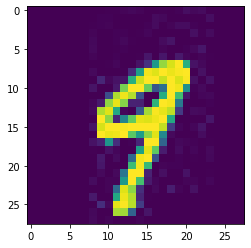

In [204]:
plt.imshow(X_test[4])

### Test Image Dataset!

In [322]:
testing_images = []
def testing_image_data():
    for i in os.listdir(test_dir):
        any_test_image = io.imread(os.path.join(test_dir,i),as_gray=True)
        testing_images.append(any_test_image)
testing_image_data()

In [323]:
testing_images = np.array(testing_images)

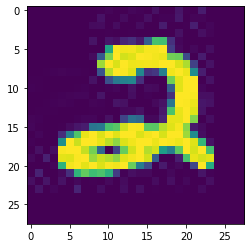

In [302]:
plt.imshow(testing_images[0])

In [303]:
testing_images.shape

(28000, 28, 28)

In [304]:
testing_img = testing_images.reshape(28000, 28, 28,1)

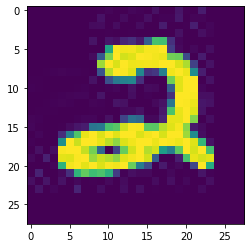

In [325]:
plt.imshow(testing_images[0])

Digit is: 2


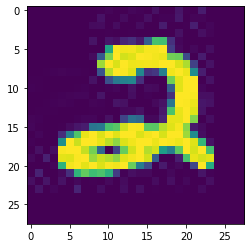

Digit is: 3


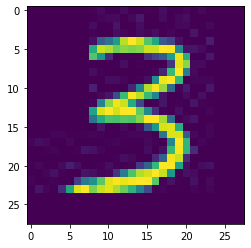

Digit is: 4


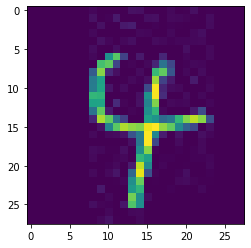

Digit is: 9


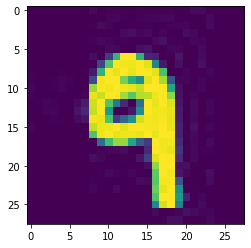

Digit is: 7


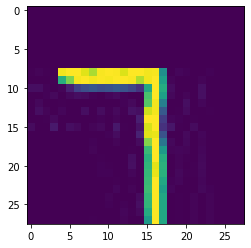

In [328]:
for check in testing_img[:5]:
    n_check = check.reshape(1,28,28,1)
    pred = model.predict(n_check)
    print('Digit is: {}'.format(np.argmax(pred)))
    plt.imshow(check.reshape(28,28))
    plt.show()